<a href="https://colab.research.google.com/github/debaggi/DTCW-BZ-DA-ML-DS/blob/main/babbel%20product%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача

> Ваша команда разработчиков хочет изучить новые способы активизации учащихся в течение нескольких недель обучения с Babbel. Перед вами стоит задача проанализировать, как учащиеся Babbel осваивают наш учебный
процесс в первые два месяца после получения полного доступа, и определить возможные пути
улучшения.
Пожалуйста, используйте прилагаемый набор данных и следующие руководящие вопросы для анализа ранних
пройдите путь вовлечения в процесс обучения и укажите на потенциал оптимизации:

- 1. Учитывая имеющиеся у вас данные, как бы вы описали поведение пользователя, которое
указывает на успешную активацию?
- 2. Чем отличается процесс раннего вовлечения в разные сегменты обучающихся?
- 3. Как используются интерактивные занятия в сочетании с другими видами обучения? Ведут
ли подписчики в режиме реального времени что-то иное, чем другие подписчики?
- 4. Предположим, что команда планирует разработать экспериментальную программу обучения, направленную на
активизацию новых учащихся в течение первых трех недель после регистрации. Команда хочет
Проводить A / B тестирование и повторять использование функции каждые 2 недели, чтобы они не могли оптимизировать ее на основе
трехнедельного запаздывания. Основываясь на вашем опыте и предоставленном наборе данных, что
что бы вы посоветовали команде сделать? Есть ли какие-либо риски, о которых им следует знать?

https://drive.google.com/drive/folders/1yrcaRwEsFn1rVaMhH3kiH0FmsIXqhEt-?usp=drive_link

Задачи:
* составить портреты клиентов
* выявить паттерны обучения клиентов с успешной активацией
* как ведут себя клиенты в первые два месяца после активации обучения

### Комментарии



```
из анализируемого датасета удаляю ошибочные данные
```

```
отфильровываю записи, удовлетворяющие условию:
age == missing AND motivation == missing
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

###  Обработка датасета learn_sessions

In [3]:
path_dataset = '/content/learning_sessions.csv'
learn_sessions = pd.read_csv(path_dataset)

In [6]:
# выбираю качественные и количественные атрибуты из датасета learning_session
learn_sessions = learn_sessions[['uuid', 'subscription_started_at', 'age', 'motivation',
       'subscription_type', 'geo_area', 'learning_activity', 'learning_os',
       'learning_language', 'session_ended_as', 'session_started_at',
       'session_local_started_at', 'time_spent']]

In [7]:
# привожу атрибуты даты-времени к типу datetime
learn_sessions['subscription_started_at'] = pd.to_datetime(learn_sessions['subscription_started_at'])
learn_sessions['session_started_at'] = pd.to_datetime(learn_sessions['session_started_at'])
learn_sessions['session_local_started_at'] = pd.to_datetime(learn_sessions['session_local_started_at'])

In [8]:
# отфильтровываю из датасета записи, в которых age = missing & motivation = missing
filtered_df = learn_sessions[(learn_sessions['age']!='missing')&(learn_sessions['motivation']!='missing')]
filtered_df.head(3)

,uuid,subscription_started_at,age,motivation,subscription_type,geo_area,learning_activity,learning_os,learning_language,session_ended_as,session_started_at,session_local_started_at,time_spent
1,072d948379bbfab373951e1ba4f039e3,2022-01-18 04:29:53,17_minus,Friends_Family,core,USA,lesson,iOS,DEU,completed,2022-01-18 04:54:18,2022-01-17 20:54:18,2.431191
2,bac98c42570186f0b57ff66f38d99314,2022-03-01 06:04:41,45-54,Work,core,USA,review,iOS,QMS,completed,2022-03-05 23:57:31,2022-03-05 15:57:31,2.265713
6,2ddb86acc0bbfd6b1dd2e9b63963f8b1,2022-02-27 13:32:39,35-44,Travel,core,USA,review,iOS,ITA,missing,2022-04-07 09:36:08,2022-04-07 05:36:08,4.052059


In [28]:
# выгружаю датасет filtered_df в csv-файл
filtered_df.to_csv('filtered.csv')

In [9]:
len(filtered_df['uuid'].unique())

2900

In [35]:
# выборка уникальных uuid
unique_uuid = filtered_df['uuid'].unique()

In [38]:
# записываю уникальные uuid в csv-файл
unique_uuid_df = pd.DataFrame(unique_uuid)
len(unique_uuid_df)
# unique_uuid.to_csv('unique_uuid.csv')

2900

In [41]:
# filtered_df[filtered_df['uuid'].isin(unique_uuid)]
only_unique_uuid = only_unique_uuid.drop_duplicates(['uuid'])
only_unique_uuid

,uuid,subscription_started_at,age,motivation,subscription_type,geo_area,learning_activity,learning_os,learning_language,session_ended_as,session_started_at,session_local_started_at,time_spent
1,072d948379bbfab373951e1ba4f039e3,2022-01-18 04:29:53,17_minus,Friends_Family,core,USA,lesson,iOS,DEU,completed,2022-01-18 04:54:18,2022-01-17 20:54:18,2.431191
2,bac98c42570186f0b57ff66f38d99314,2022-03-01 06:04:41,45-54,Work,core,USA,review,iOS,QMS,completed,2022-03-05 23:57:31,2022-03-05 15:57:31,2.265713
6,2ddb86acc0bbfd6b1dd2e9b63963f8b1,2022-02-27 13:32:39,35-44,Travel,core,USA,review,iOS,ITA,missing,2022-04-07 09:36:08,2022-04-07 05:36:08,4.052059
8,67e301facca5189116b29f8df9a175f7,2022-02-20 02:14:38,17_minus,Interest,core,USA,audio,iOS,FRA,completed,2022-02-20 17:39:16,2022-02-20 09:39:16,3.495342
11,ff00c8aea5bc4e6ba9431aded0d74c89,2022-01-17 15:35:16,35-44,Travel,core,USA,lesson,iOS,QMS,completed,2022-01-24 16:01:33,2022-01-24 11:01:33,3.260316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272678,0a0cccb1dda06314fbee663f4473bad6,2022-04-29 14:16:01,18-24,Skills,core,GSM,lesson,Android,ENG,matched,2022-04-29 18:09:15,2022-04-29 20:09:15,1.619296
275076,c0c6c736803705a1be67720d96c4ca89,2022-05-11 15:40:47,35-44,Work,core,GSM,lesson,iOS,FRA,completed,2022-05-20 06:05:24,2022-05-20 08:05:24,9.583700
281137,af68a9c673884615f9880ff7b9943989,2022-05-07 11:28:36,35-44,Boost_my_career,core,GSM,lesson,iOS,ENG,completed,2022-05-07 11:32:16,2022-05-07 13:32:16,0.409841
281771,8eb72efa1bf3659c249e200810e30a19,2022-05-08 10:35:48,18-24,Work,core,GSM,lesson,iOS,FRA,completed,2022-05-20 10:55:47,2022-05-20 12:55:47,9.675295


In [42]:
# ответ на вопрос: сколько клиентов подписаны на тариф core, а сколько на live
only_unique_uuid.groupby(['subscription_type']).agg({'uuid':'count'})

,uuid
subscription_type,
core,2858
live,42


In [18]:
number_clients_by_group = filtered_df.groupby(['age']).agg({'uuid':'count'})
display(number_clients_by_group )

,uuid
age,
17_minus,8513
18-24,24896
25-34,3062
35-44,47399
45-54,40714
55-64,34207
65_plus,19342


In [19]:
# количество клиентов в разрезе групп клиентов, организованных по  мотивации и возрастам
age_groups_clients = filtered_df.groupby(['age', 'motivation']).agg({'uuid':'count',
                                                'time_spent':'mean'})
display(age_groups_clients)

uuid  time_spent
age      motivation                                    
17_minus Boost_my_career                 97    3.353227
         Connect_with_family/friends    233    3.729038
         Culture_interest_or_holidays   138    3.579646
         Family_Friends                 194    4.709539
         Friends_Family                1018    3.404830
...                                     ...         ...
65_plus  Other                         1018    7.520699
         School                          20    4.199806
         Skills                        1895    5.138502
         Travel                        3471    5.550898
         Work                            52    4.251942

[85 rows x 2 columns]

In [ ]:
age_groups_clients.to_csv('age_groups_clients.csv')

In [ ]:
# датафрейм, который описывает поведение всех клиентов обучающей платформы
info_about_clients = filtered_df

info_about_clients['delta_date'] = info_about_clients['session_started_at'] - info_about_clients['subscription_started_at']
info_about_clients['delta_date'] = info_about_clients['delta_date'].dt.days

info_about_clients = info_about_clients.sort_values('delta_date')
info_about_clients

<ipython-input-18-917c95a16b9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_about_clients['delta_date'] = info_about_clients['session_started_at'] - info_about_clients['subscription_started_at']
<ipython-input-18-917c95a16b9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_about_clients['delta_date'] = info_about_clients['delta_date'].dt.days


,uuid,subscription_started_at,age,motivation,subscription_type,geo_area,learning_activity,learning_os,learning_language,session_ended_as,session_started_at,session_local_started_at,time_spent,delta_date
1,072d948379bbfab373951e1ba4f039e3,2022-01-18 04:29:53,17_minus,Friends_Family,core,USA,lesson,iOS,DEU,completed,2022-01-18 04:54:18,2022-01-17 20:54:18,2.431191,0
72741,ad8e6a0d0e6b26c8bcac5f6fe219ddbf,2022-01-02 23:03:32,18-24,Interest,core,USA,lesson,iOS,QMS,completed,2022-01-02 23:14:28,2022-01-02 18:14:28,2.089713,0
72739,03e775a37330257b4492d928907a22f7,2022-03-08 03:07:37,35-44,Work,core,USA,lesson,iOS,SPA,completed,2022-03-08 03:40:53,2022-03-07 22:40:53,9.670180,0
72730,922a28ab119d122ce313d2619cf0876f,2022-03-30 02:30:19,18-24,Work,core,USA,lesson,iOS,QMS,completed,2022-03-30 02:49:56,2022-03-29 19:49:56,2.470926,0
72725,76819a624214858dbd5a04acb06e08c0,2022-04-22 01:26:06,45-54,Interest,core,USA,lesson,iOS,FRA,completed,2022-04-22 01:30:12,2022-04-21 21:30:12,2.099788,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104451,e606cad65d6fd3272bf63fa790d79ea1,2022-03-09 09:19:35,18-24,Travel,core,GSM,review,iOS,SPA,completed,2022-05-08 16:51:18,2022-05-08 18:51:18,3.342336,60
256593,957d5abf4cf7157ca89c6d7d82b2ab52,2022-04-17 17:39:45,45-54,Travel,core,GSM,lesson,Android,SPA,matched,2022-06-17 05:10:03,2022-06-17 07:10:03,5.457728,60
138815,e606cad65d6fd3272bf63fa790d79ea1,2022-03-09 09:19:35,18-24,Travel,core,GSM,lesson,iOS,SPA,completed,2022-05-08 16:54:25,2022-05-08 18:54:25,2.178329,60
28223,957d5abf4cf7157ca89c6d7d82b2ab52,2022-04-17 17:39:45,45-54,Travel,core,GSM,review,Android,SPA,completed,2022-06-17 05:17:05,2022-06-17 07:17:05,3.669027,60


In [ ]:
active_clients_0_days = info_about_clients[info_about_clients['delta_date'] == 0]
active_clients_7_days = info_about_clients[info_about_clients['delta_date'] == 7]
active_clients_14_days = info_about_clients[info_about_clients['delta_date'] == 14]
active_clients_21_days = info_about_clients[info_about_clients['delta_date'] == 21]
active_clients_28_days = info_about_clients[info_about_clients['delta_date'] == 28]

count_active_clients_0_days = len(active_clients_0_days)
count_active_clients_7_days = len(active_clients_7_days)
count_active_clients_14_days = len(active_clients_14_days)
count_active_clients_21_days = len(active_clients_21_days)
count_active_clients_28_days = len(active_clients_28_days)

count_active_clients_0_days, count_active_clients_7_days, count_active_clients_14_days, count_active_clients_21_days, count_active_clients_28_days

(18040, 4889, 3353, 2820, 2354)

In [ ]:
info_about_clients.to_csv('info_about_clients.csv')

исследование датасета, который описывает характеристики клиентов (только уникальные uuid)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# все сессии всех клиентов после фильтрации исходного датасета
filtered_by_uuid = pd.read_csv('/content/Filtered UUIDs.csv')

In [ ]:
filtered_by_uuid.columns

Index(['Unnamed: 0', 'uuid', 'subscription_started_at', 'age', 'motivation',
       'subscription_type', 'geo_area', 'learning_activity', 'learning_os',
       'learning_language', 'session_ended_as', 'session_started_at',
       'session_local_started_at', 'time_spent', 'delta_date'],
      dtype='object')

In [ ]:
# выборка уникальных клиентов
dataset_by_unique_uuid = pd.read_csv('/content/Unique clients info.csv')
info_about_unique_clients = dataset_by_unique_uuid[['uuid', 'age', 'learning_language','motivation', 'subscription_type', 'geo_area', 'learning_activity', 'learning_os']]

display(info_about_unique_clients.iloc[:3])

,uuid,age,learning_language,motivation,subscription_type,geo_area,learning_activity,learning_os
0,072d948379bbfab373951e1ba4f039e3,17_minus,DEU,Friends_Family,core,USA,lesson,iOS
1,bac98c42570186f0b57ff66f38d99314,45-54,QMS,Work,core,USA,review,iOS
2,2ddb86acc0bbfd6b1dd2e9b63963f8b1,35-44,ITA,Travel,core,USA,review,iOS


In [ ]:
# @title Default title text
# какие языки изучают клиенты. сколько клиентов изучает каждый язык
# из каких регионов клиенты
# какие языки изучают в каждом регионе
# какие активности пользуются наибольшим и наименьшим интересом у клиентов
# как распределяются активности в разрезе возрастов
# как распределяются активности в разрезе операционных систем
# как связаны типы завершения сессий и активности
# как связаны типы завершения сессий и активности + операционные системы

In [ ]:
# какими операционными системами пользуются клиенты
pd.DataFrame(info_about_unique_clients.groupby('learning_os').agg({'uuid':'count'})).sort_values('uuid', ascending=False)

,uuid
learning_os,
iOS,1650
Android,795
Windows,308
Mac OS X,126
Linux,7
Chrome OS,5


In [ ]:
pd.DataFrame(info_about_unique_clients.groupby('geo_area').agg({'uuid':'count'})).sort_values('uuid', ascending=False)

,uuid
geo_area,
USA,989
GSM,935
FIM,444
ESM,382
SPM,150


In [ ]:
# какие языки изучают клиенты
pd.DataFrame(info_about_unique_clients.groupby('learning_language').agg({'uuid':'count'})).sort_values('uuid', ascending=False)

,uuid
learning_language,
ENG,737
QMS,550
SPA,420
FRA,342
ITA,337
DEU,161
RUS,93
POR,72
NLD,39


In [ ]:
geo_area_learn_language = pd.DataFrame(info_about_unique_clients.groupby(['geo_area', 'learning_language']).agg({'uuid':'count'})).sort_values('uuid', ascending=False)
geo_area_learn_language

uuid
geo_area learning_language      
USA      QMS                 515
GSM      ENG                 367
FIM      ENG                 234
GSM      SPA                 154
         ITA                 137
...                          ...
FIM      SWE                   1
SPM      TUR                   1
         SWE                   1
GSM      IND                   1
USA      TUR                   1

[68 rows x 1 columns]

In [ ]:
# сводная таблица, описывающая кол-во клиентов в разрезе дней с даты подписки на сервис и мотивации клиента
filtered_info_about_clients = info_about_clients[info_about_clients['delta_date'].isin([0, 7, 14, 21, 28])]
grouped_filtered_info_about_clients = filtered_info_about_clients.groupby(['age', 'motivation', 'delta_date']).agg({'uuid':'count'})
grouped_filtered_info_about_clients

uuid
age      motivation                  delta_date      
17_minus Boost_my_career             0             31
                                     7              1
                                     28             2
         Connect_with_family/friends 0             17
                                     14             2
...                                               ...
65_plus  Travel                      14           114
                                     21            57
                                     28            38
         Work                        0             18
                                     7              1

[380 rows x 1 columns]

In [ ]:
grouped_filtered_info_about_clients.to_csv('grouped_filtered_info_about_clients.csv')

### Исследование датафрейма

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

In [ ]:
all_sessions = pd.read_csv('')

In [ ]:
all_sessions.columns

Index(['Unnamed: 0', 'uuid', 'age', 'motivation', 'geo_area', 'learning_os',
       'subscription_type', 'learning_language', 'learning_activity',
       'subscription_month', 'subscription_day', 'subscription_time',
       'session_local_started_at', 'session_month', 'session_day',
       'session_time', 'time_spent', 'session_ended_as'],
      dtype='object')

In [ ]:
all_sessions = all_sessions[['uuid', 'age', 'motivation', 'geo_area', 'learning_os',
       'subscription_type', 'learning_language', 'learning_activity','session_local_started_at','time_spent', 'session_ended_as']]

In [ ]:
all_sessions['subscription_started_at'] = pd.to_datetime(all_sessions['subscription_started_at'])
all_sessions['session_started_at '] = pd.to_datetime(all_sessions['session_started_at'])

In [ ]:
all_sessions['delta_day'] = all_sessions['session_started_at '] - all_sessions['subscription_started_at']

In [ ]:
all_sessions.drop(columns=['Unnamed: 0', 'delta_date'], inplace=True)

In [ ]:
all_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178133 entries, 0 to 178132
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   uuid                      178133 non-null  object         
 1   subscription_started_at   178133 non-null  datetime64[ns] 
 2   age                       178133 non-null  object         
 3   motivation                178133 non-null  object         
 4   subscription_type         178133 non-null  object         
 5   geo_area                  178133 non-null  object         
 6   learning_activity         178133 non-null  object         
 7   learning_os               177662 non-null  object         
 8   learning_language         177973 non-null  object         
 9   session_ended_as          178133 non-null  object         
 10  session_started_at        178133 non-null  object         
 11  session_local_started_at  177010 non-null  object   

In [ ]:
number_unique_clients = len(all_sessions['uuid'].unique())
print(f'количество клиентов: {number_unique_clients}')

количество клиентов: 2900


In [ ]:
number_clients = all_sessions.groupby(['age'])['uuid'].agg('count')
number_clients

,uuid
age,
17_minus,8513
18-24,24896
25-34,3062
35-44,47399
45-54,40714
55-64,34207
65_plus,19342


In [ ]:
number_clients.sum()

178133

In [ ]:
all_sessions['delta_day'] = all_sessions['delta_day'].dt.days

In [ ]:
all_sessions.sort_values('delta_day', ascending=False)

ended_missing = all_sessions[all_sessions['session_ended_as'] != 'completed']
ended_completed = all_sessions[all_sessions['session_ended_as'] == 'completed']
count_missing_session = len(ended_missing)
count_completed_session = len(ended_completed)
print(f'кол-во сессий, которые завершены с ошибкой: {count_missing_session}\nкол-во сессий, которые успешно завершены: {count_completed_session}')

кол-во сессий, которые завершены с ошибкой: 69238
кол-во сессий, которые успешно завершены: 108895


In [ ]:
# уникальные uuid
unique_uuid = info_about_clients['uuid'].unique()
count_unique_clients_by_delta_date = info_about_clients[info_about_clients['uuid'].isin(unique_uuid)]

In [ ]:
max_sessions = count_clients_by_delta_date.sort_values(ascending=False).values[0]

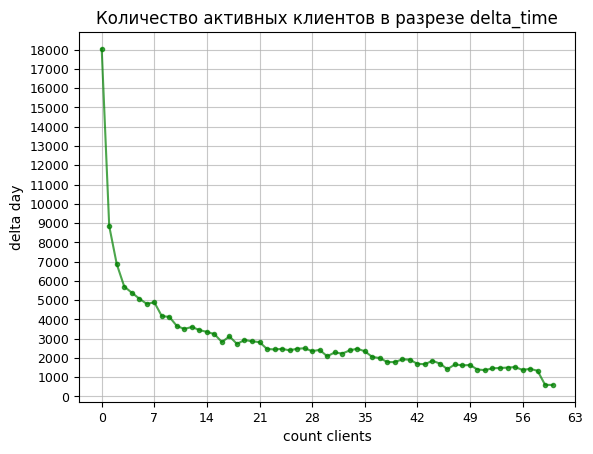

In [ ]:
import numpy as np

count_unique_clients_by_delta_date.groupby(['delta_day'])['uuid'].agg('count').plot(kind='line', color='green', alpha=.7, marker='.', title='Количество активных клиентов в разрезе delta_time', fontsize='9')

plt.xticks(np.arange(0, 70, 7))
plt.yticks(np.arange(0, max_sessions, 1000))
plt.xlabel('count clients')
plt.ylabel('delta day')
plt.grid(alpha=.7)
plt.show()

In [ ]:
grouped_df = ordered_df.groupby(['uuid','age', 'motivation', 'subscription_type', 'geo_area', 'learning_os']).agg({'time_spent':'sum'})

## upgrade dataframe

In [ ]:
# upgrd_df = pd.read_csv('')

In [ ]:
# upgrd_df = датафрейм с включенными в него месяцем, датой, временем начала подписки
# upgrd_df = ordered_df

upgrd_df['subscription_started_at'] = pd.to_datetime(upgrd_df['subscription_started_at'])
upgrd_df['session_started_at'] = pd.to_datetime(upgrd_df['session_started_at'])

In [ ]:
# выделение параметров: дата, месяц, время начала подписки
upgrd_df['subscription_month'] = upgrd_df['subscription_started_at'].dt.month
upgrd_df['subscription_day'] = upgrd_df['subscription_started_at'].dt.day
upgrd_df['subscription_time'] = upgrd_df['subscription_started_at'].dt.time


# выделение параметров: дата, месяц, время начала подписки
upgrd_df['session_month'] = upgrd_df['session_started_at'].dt.month
upgrd_df['session_day'] = upgrd_df['session_started_at'].dt.day
upgrd_df['session_time'] = upgrd_df['session_started_at'].dt.time


upgrd_df.head(3)

,uuid,subscription_started_at,age,motivation,subscription_type,geo_area,learning_activity,learning_os,learning_language,session_ended_as,...,time_spent,month,day,time,subscription_month,subscription_day,subscription_time,session_month,session_day,session_time
2806,eee65d5b85267cd5b3938c90d85893a0,2022-01-01 00:18:55,65_plus,Interest,core,USA,review,iOS,FRA,missing,...,1.966250,1,1,00:18:55,1,1,00:18:55,2,13,01:08:12
3320,eee65d5b85267cd5b3938c90d85893a0,2022-01-01 00:18:55,65_plus,Interest,core,USA,review,Windows,FRA,completed,...,0.225406,1,1,00:18:55,1,1,00:18:55,1,30,21:24:30.410000
194038,eee65d5b85267cd5b3938c90d85893a0,2022-01-01 00:18:55,65_plus,Interest,core,USA,review,Windows,FRA,completed,...,3.669493,1,1,00:18:55,1,1,00:18:55,1,18,01:05:06.806000


In [ ]:
# вычисление кол-ва сессий на клиента
count_sessions_df = pd.DataFrame(upgrd_df.groupby(['uuid']).agg({'uuid':'count'})).rename(columns={'uuid':'count_sessions'}).sort_values('count_sessions', ascending=False)
count_sessions_df.head(3)

,count_sessions
uuid,
2115f2292d60c559aaf0e8c6c07e8ab0,3335
0f720834fd28863eb5df9d964496e50f,1811
f8114081ae74a6e529219b033ee0ba34,994


In [ ]:
# выгрузка датасета upgrd_df
# upgrd_df.to_csv('upgrd_df.csv')

In [ ]:
grouped_ordered_df = pd.DataFrame(upgrd_df.groupby(['uuid']).agg({'uuid':'count','time_spent':'sum'}))

grouped_ordered_df = grouped_ordered_df.rename(columns={'uuid':'count_sessions'})
grouped_ordered_df

,count_sessions,time_spent
uuid,,
001d357d114acce8661069c8b40b2bff,34,140.852433
0021f3d96885b4d76f93ff4e044c39f7,60,219.775454
006a07306a35da73484f0db0d98174cb,63,236.281579
00737f5186cfd6853ea01b654e3c278d,13,28.769826
00831285665c81cf0dc2b829e3bb6fc5,7,42.373935
...,...,...
ff78b2311421b913f4df6195a09f9ef5,190,1050.602083
ffa12c1ebef9e6090f740a3158c47261,117,367.780068
ffb6e6abf7be67177810ec16489971e8,178,734.232116


In [ ]:
# выгрузка датасета, в котором описано кол-во сессий на клиента, суммарным инвестированным в обучение временем на пользователя
grouped_ordered_df.to_csv('count_sessions_by_uuid.csv')

In [ ]:
grouped_ordered_df['month'] = grouped_ordered_df['subscription_started_at'].dt.month
grouped_ordered_df['day'] = grouped_ordered_df['subscription_started_at'].dt.day
grouped_ordered_df['time'] = grouped_ordered_df['subscription_started_at'].dt.time
# grouped_ordered_df.sort_values('count_sessions', ascending=False)

# Ответы на вопросы

1. Учитывая имеющиеся у вас данные, как бы вы описали поведение пользователя, которое указывает на успешную активацию?

In [ ]:
# частота учебных сессий

In [ ]:
# время сессии по каждой сессии каждого пользователя

In [ ]:
# типы завершения сессий: количество по каждому типу

In [ ]:
# сколько раз пользователь использовал разные типы активностей

Чем отличается процесс раннего вовлечения в разные сегменты обучающихся?

Как используются интерактивные занятия в сочетании с другими видами обучения? Ведут ли подписчики в режиме реального времени что-то иное, чем другие подписчики?

Предположим, что команда планирует разработать экспериментальную программу обучения, направленную на активизацию новых учащихся в течение первых трех недель после регистрации. Команда хочет Проводить A / B тестирование и повторять использование функции каждые 2 недели, чтобы они не могли оптимизировать ее на основе трехнедельного запаздывания. Основываясь на вашем опыте и предоставленном наборе данных, что что бы вы посоветовали команде сделать? Есть ли какие-либо риски, о которых им следует знать?

In [ ]:
import numpy as np

In [ ]:
number_clients_list = [827, 612, 565, 425, 230, 199, 42]
average_time_spent_list = [7.4, 5.5, 4.7, 4.3, 4.2, 4.1, 3.8]

mean_num_clients = np.array(number_clients_list).mean().round(2)
mean_average_time_spent_list = np.array(average_time_spent_list).mean().round(2)

mean_num_clients, mean_average_time_spent_list

(414.29, 4.86)